# MSA 2025 Phase 2 - Part 2: Minimum Temperature Prediction from Weather Data

In [1]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Load and check the dataset

In [10]:
weather = pd.read_csv("Summary of Weather.csv", low_memory = False)
weather = weather.dropna(axis=0, subset="MIN")
weather.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
len(weather)

118572

## 2. Clean the dataset, drop variables

<Axes: >

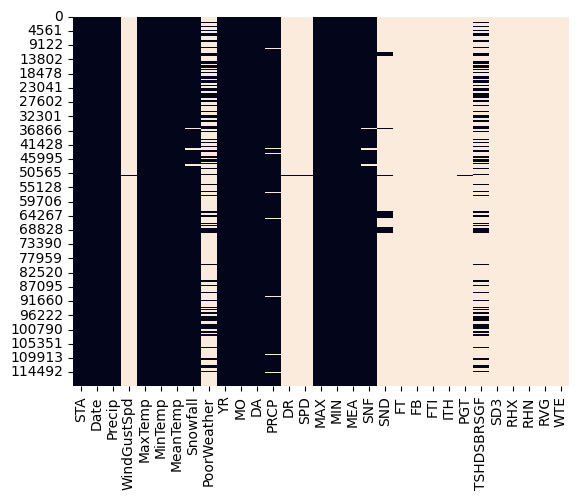

In [13]:
sns.heatmap(weather.isnull(), cbar=False)

Quite a few variables are mostly or entirely unrecorded. 

In [14]:
np.all(weather["PoorWeather"].dropna() == weather["TSHDSBRSGF"].dropna())
weather["SND"].unique()

array([nan,  0.])

In [15]:
weather["PoorWeather"].value_counts()

PoorWeather
1             31965
0               869
1     1         310
100000          263
1 1             133
1 1  1           96
1000             90
100001           62
1    1           56
101000           56
1000001000       52
1  1             49
1000001001       45
11               39
1001             16
1100000          16
101001           14
1   1 1          14
1000101001       13
1000101000        9
11 1              8
1000000           7
1000000000        6
1     1  1        5
11    1           5
1010001000        5
1   1 1  1        2
1101000           2
1010001001        2
1000100001        2
1 0  1            2
1        1        1
1     0           1
10001001          1
1000100000        1
1 0               1
1101001           1
1   1             1
Name: count, dtype: int64

TSHDSBRSGF refers to a variety of weather types, so the binary strings are combinations of conditions. Given the small counts of most strings, I'll code 0 and nan as a 0 and anything else as a 1

In [63]:
weather.dropna(subset=["MIN", "MAX", "MEA"], inplace=True)
cleanWeather = weather.iloc[:, 0:9].copy(deep=True)
cleanWeather["PoorWeather"] = cleanWeather["PoorWeather"].fillna(value=0)
cleanWeather["PoorWeather"] = cleanWeather["PoorWeather"].replace(".*1.*",1, regex=True)
cleanWeather["PoorWeather"] = pd.to_numeric(cleanWeather["PoorWeather"], errors="raise")

cleanWeather["Precip"] = cleanWeather["Precip"].replace("T", 0.1)
cleanWeather["Precip"] = pd.to_numeric(cleanWeather["Precip"], errors="raise")

cleanWeather["Snowfall"] = pd.to_numeric(cleanWeather["Snowfall"], errors='coerce')

#cleanWeather["MaxfromMean"] = cleanWeather["MaxTemp"] - cleanWeather["MeanTemp"]

cleanWeather = cleanWeather.drop("WindGustSpd", axis = 1)
cleanWeather = cleanWeather.dropna(axis=0)
cleanWeather = cleanWeather.sort_values("Date", ascending=False)
cleanWeather


,STA,Date,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather
5438,10502,1945-9-9,0.100,32.777778,21.666667,27.222222,0.0,1
40331,13013,1945-9-9,0.000,31.111111,15.000000,23.333333,0.0,0
93887,34113,1945-9-9,19.050,26.666667,15.555556,21.111111,0.0,1
17493,10806,1945-9-9,0.762,27.222222,16.666667,22.222222,0.0,0
96237,41204,1945-9-9,23.876,30.555556,23.888889,27.222222,0.0,0
...,...,...,...,...,...,...,...,...
6298,10701,1940-1-10,0.000,33.888889,22.777778,28.333333,0.0,0
57886,22508,1940-1-10,0.508,23.333333,14.444444,18.888889,0.0,0
54500,22504,1940-1-1,2.286,26.666667,17.222222,22.222222,0.0,0
6289,10701,1940-1-1,7.620,28.333333,22.222222,25.555556,0.0,0


In [51]:
weather.loc[weather['MAX'] == weather["MEA"]]

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
670,10001,1944-5-2,0,NaN,26.666667,22.222222,26.666667,0,1,44,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
9266,10703,1945-9-15,107.442,NaN,24.444444,23.888889,24.444444,0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21651,11604,1942-8-1,0,NaN,27.777778,27.777778,27.777778,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23549,11606,1944-6-11,1.778,NaN,28.888889,23.888889,28.888889,0,1,44,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
41667,13601,1943-6-12,0,NaN,26.111111,22.777778,26.111111,0,NaN,43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42031,13601,1944-6-10,0,NaN,26.111111,22.222222,26.111111,0,NaN,44,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44109,16202,1941-9-21,15.748,NaN,13.333333,12.777778,13.333333,0,NaN,41,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44341,16202,1942-5-11,0,NaN,8.888889,8.333333,8.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44353,16202,1942-5-23,0,NaN,10.000000,9.444444,10.000000,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45366,16405,1941-12-7,10.668,NaN,1.111111,0.555556,1.111111,10.16,NaN,41,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
weather.loc[weather['MIN'] == weather["MEA"]]

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
408,10001,1943-8-13,0,NaN,21.111111,20.555556,20.555556,0,NaN,43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21469,11604,1942-1-31,0,NaN,25.555556,25.000000,25.000000,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21651,11604,1942-8-1,0,NaN,27.777778,27.777778,27.777778,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38360,13002,1945-11-10,0,NaN,22.222222,16.666667,16.666667,0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46786,16405,1945-10-27,0,NaN,-1.666667,-7.777778,-7.777778,15.24,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69925,32602,1944-6-28,0,NaN,32.777778,27.222222,27.222222,0,NaN,44,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81825,33031,1943-12-13,30.734,NaN,7.777778,6.666667,6.666667,0,NaN,43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82076,33031,1944-8-20,0,NaN,35.000000,26.666667,26.666667,0,NaN,44,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84936,33117,1945-12-11,36.068,NaN,11.666667,6.666667,6.666667,0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

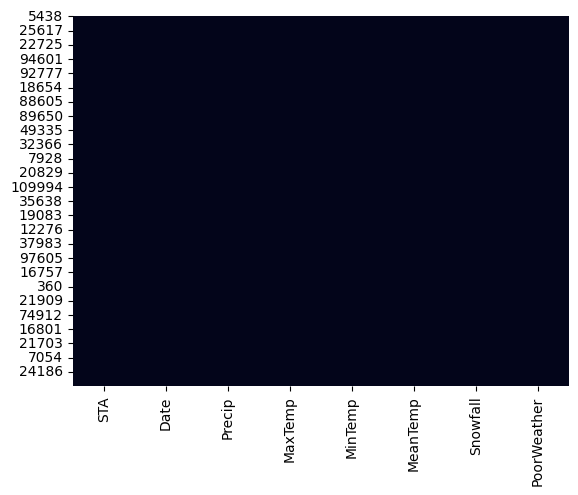

In [64]:
sns.heatmap(cleanWeather.isnull(), cbar=False)

<Axes: xlabel='Snowfall', ylabel='Count'>

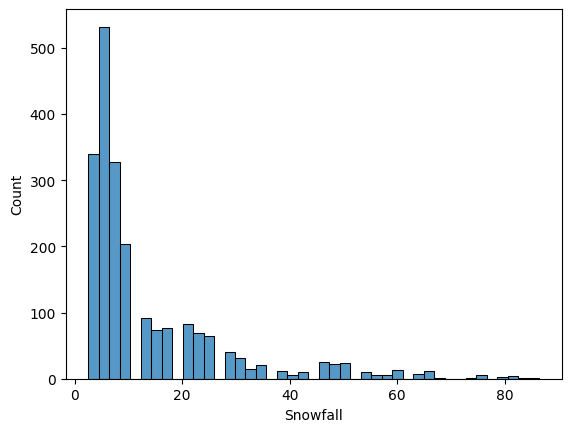

In [25]:
sns.histplot(cleanWeather.loc[cleanWeather['Snowfall'] > 0, 'Snowfall'])

In [26]:
cleanWeather.dtypes

STA              int64
Date            object
Precip         float64
MaxTemp        float64
MinTemp        float64
MeanTemp       float64
Snowfall       float64
PoorWeather      int64
dtype: object

In [65]:
cleanWeather.isnull().any().any()

np.False_

In [28]:
len(cleanWeather["STA"].unique())

159

([<matplotlib.axis.XTick at 0x7b1b20134a40>,
 [Text(0, 0, '1945-9-9'),
  Text(365, 0, '1944-9-9'),
  Text(730, 0, '1944-1-1'),
  Text(1095, 0, '1943-1-1')])

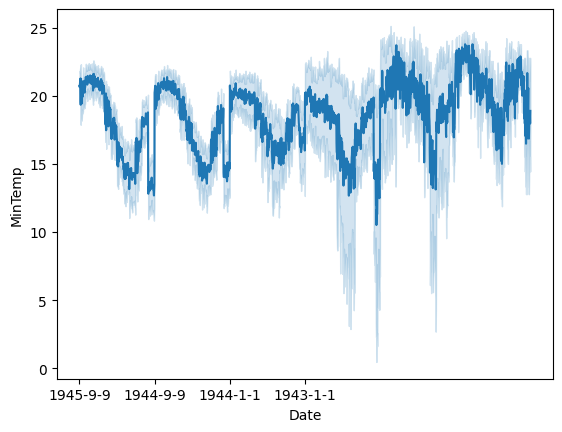

In [29]:

sns.lineplot(x='Date', y='MinTemp', data=cleanWeather)
plt.xticks(range(0,1100,365))

## 3. Select the feature(s) for the model, and explain the reason

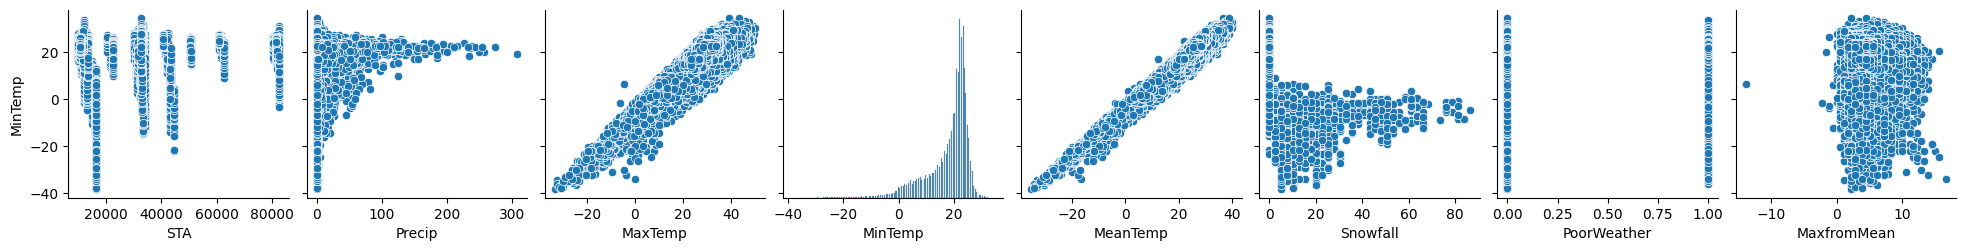

In [41]:
sns.pairplot(data=cleanWeather, y_vars="MinTemp")

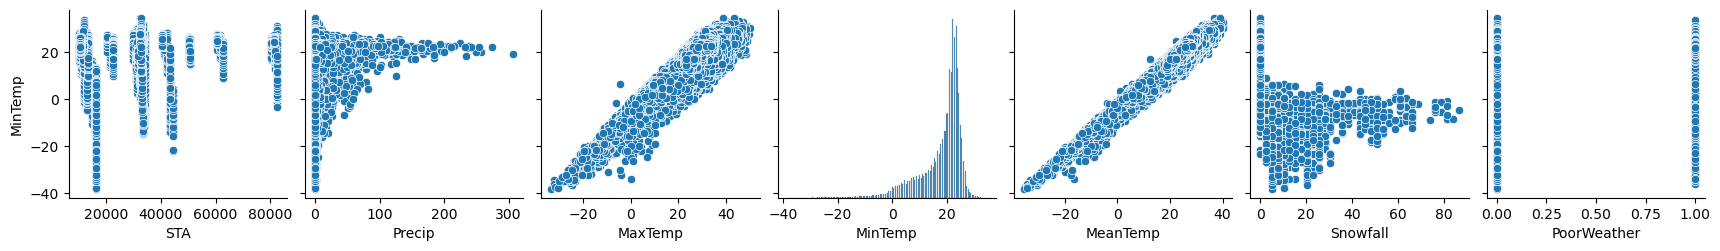

In [231]:
# write your answer here
sns.pairplot(data=cleanWeather, y_vars="MinTemp")

<Axes: xlabel='PoorWeather', ylabel='MinTemp'>

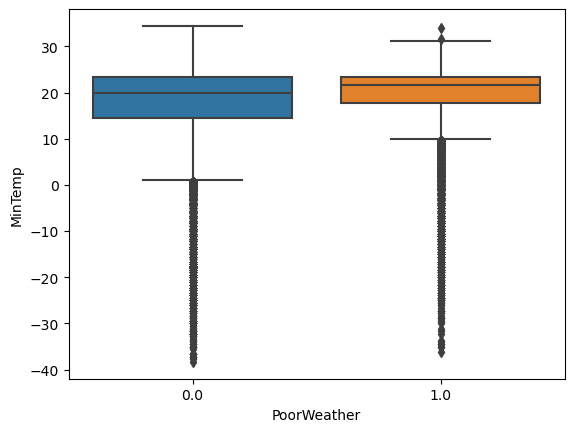

In [207]:
sns.boxplot(y="MinTemp", x="PoorWeather", data=cleanWeather)

## 4. Split the dataset (80% for training, 20% for testing)

In [67]:
import sklearn.model_selection

target = cleanWeather["MinTemp"]
features = cleanWeather.drop(['MinTemp', "STA", "Date"], axis= 1)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(features, target, test_size = 0.2)

## 5. Choose the algorithm, train and test the model

Using the sklearn machine learning map, I'll start with SGD regressor. 

In [82]:
from sklearn.pipeline import make_pipeline
import sklearn.preprocessing
est = make_pipeline(sklearn.preprocessing.StandardScaler(), sklearn.linear_model.SGDRegressor())
est.fit(X_train, y_train)
X_train.head()

,Precip,MaxTemp,MeanTemp,Snowfall,PoorWeather
115249,0.000,33.888889,26.111111,0.0,0
4348,53.848,31.111111,26.111111,0.0,1
62928,0.000,26.111111,19.444444,0.0,1
104333,0.000,26.111111,23.888889,0.0,0
14417,1.270,30.555556,27.222222,0.0,1


,MeanTemp
115249,26.111111
4348,26.111111
62928,19.444444
104333,23.888889
14417,27.222222
...,...
78776,24.444444
11642,27.777778
108684,26.666667
82650,18.888889


In [118]:
mean_only = make_pipeline(sklearn.preprocessing.StandardScaler(), sklearn.linear_model.SGDRegressor())
mean_only.fit(X_train[["MeanTemp", "MaxTemp"]], y_train)
prediction = mean_only.predict(X_test[["MeanTemp", "MaxTemp"]])
print(sklearn.metrics.r2_score(y_test, prediction))
sklearn.metrics.root_mean_squared_error(y_test, prediction)

0.9957773178444321


0.5040477755141722

,MeanTemp,MaxTemp
115249,26.111111,33.888889
4348,26.111111,31.111111
62928,19.444444,26.111111
104333,23.888889,26.111111
14417,27.222222,30.555556
...,...,...
78776,24.444444,29.444444
11642,27.777778,32.222222
108684,26.666667,30.000000
82650,18.888889,26.666667


## 6. Evaluate and Visualize model Performance

In [125]:
prediction = est.predict(X_test)
error = prediction - y_test


<Axes: ylabel='MinTemp'>

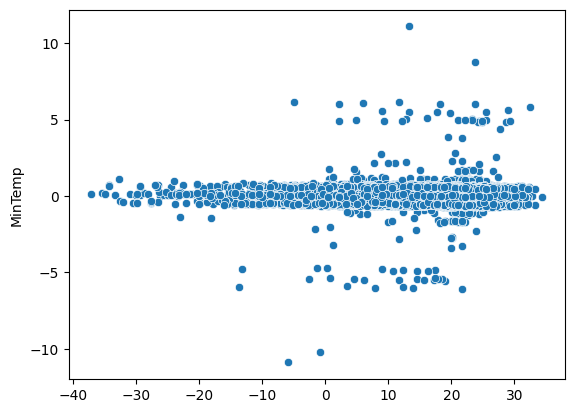

In [126]:
sns.scatterplot(x=prediction, y=error)

In [120]:
error

94227     0.044203
12702    -0.064043
57387     0.560207
112993   -0.143145
37583    -0.041142
            ...   
29719    -0.030738
19577     0.481330
24606     0.079496
8765      0.464450
15408     0.551879
Name: MinTemp, Length: 23470, dtype: float64

<Axes: xlabel='MinTemp', ylabel='Count'>

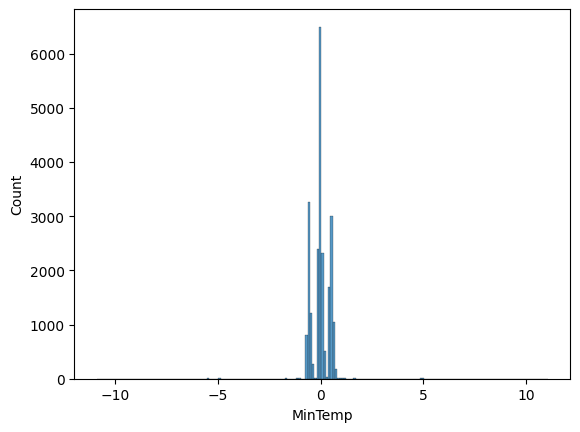

In [123]:
sns.histplot(error, binwidth=1/9)

## 7. What is the R² value and RMSE of the model? How these values indicate the model performance?

In [127]:
# write your answer here
print(sklearn.metrics.r2_score(y_test, prediction))
sklearn.metrics.root_mean_squared_error(y_test, prediction)

0.9957820876329568


0.5037630180406869

In words, this model accounts for (i.e. predicts) 99.6 % of the variability of minimum temperature, and is on average 0.5 degrees celcius off. 

In [130]:
error

94227     0.032604
12702    -0.072036
57387     0.551811
112993   -0.152992
37583    -0.053522
            ...   
29719    -0.036606
19577     0.501825
24606     0.080915
8765      0.457390
15408     0.545079
Name: MinTemp, Length: 23470, dtype: float64

In [134]:
cleanWeather["Error"] = error
cleanWeather["Predicted"] = est.predict(features)


In [135]:
cleanWeather

,STA,Date,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,Error,Predicted
5438,10502,1945-9-9,0.100,32.777778,21.666667,27.222222,0.0,1,NaN,21.719529
40331,13013,1945-9-9,0.000,31.111111,15.000000,23.333333,0.0,0,0.642866,15.642866
93887,34113,1945-9-9,19.050,26.666667,15.555556,21.111111,0.0,1,NaN,15.649861
17493,10806,1945-9-9,0.762,27.222222,16.666667,22.222222,0.0,0,NaN,17.208417
96237,41204,1945-9-9,23.876,30.555556,23.888889,27.222222,0.0,0,NaN,23.824663
...,...,...,...,...,...,...,...,...,...,...
6298,10701,1940-1-10,0.000,33.888889,22.777778,28.333333,0.0,0,NaN,22.765618
57886,22508,1940-1-10,0.508,23.333333,14.444444,18.888889,0.0,0,-0.025095,14.419350
54500,22504,1940-1-1,2.286,26.666667,17.222222,22.222222,0.0,0,NaN,17.744736
6289,10701,1940-1-1,7.620,28.333333,22.222222,25.555556,0.0,0,NaN,22.677850


In [107]:
X_train.head()

,Precip,MaxTemp,MeanTemp,Snowfall,PoorWeather
115249,0.000,33.888889,26.111111,0.0,0
4348,53.848,31.111111,26.111111,0.0,1
62928,0.000,26.111111,19.444444,0.0,1
104333,0.000,26.111111,23.888889,0.0,0
14417,1.270,30.555556,27.222222,0.0,1


In [106]:
est.steps[1][1].coef_

array([ 1.30181581e-02, -7.67272025e+00,  1.49595835e+01,  6.09694801e-03,
        2.76367565e-02])

In [136]:
cleanWeather.loc[abs(cleanWeather['Error']) > 5]

,STA,Date,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,Error,Predicted
51399,20602,1945-9-12,0.000,30.555556,26.666667,31.666667,0.00,0,5.835885,32.502552
90512,34012,1945-9-11,0.000,27.222222,15.000000,25.555556,0.00,0,8.737580,23.737580
67893,32503,1945-9-10,0.000,36.111111,27.777778,28.888889,0.00,0,-6.061712,21.716066
91315,34022,1945-7-24,0.000,30.555556,11.111111,23.333333,0.00,0,5.066230,16.177341
43881,16201,1945-6-7,0.100,12.777778,5.000000,3.333333,0.00,0,-10.899849,-5.899849
57684,22507,1945-5-22,0.000,29.444444,17.777778,26.666667,0.00,0,5.998597,23.776375
86307,33303,1945-4-26,0.000,25.555556,12.222222,21.666667,0.00,0,5.500350,17.722572
39234,13005,1945-4-20,0.000,32.222222,18.333333,27.777778,0.00,1,5.008897,23.342230
91199,34022,1945-3-30,0.762,15.000000,6.111111,7.777778,0.00,1,-5.379744,0.731367
86266,33303,1945-3-16,0.000,18.888889,7.777778,16.111111,0.00,0,5.475019,13.252797


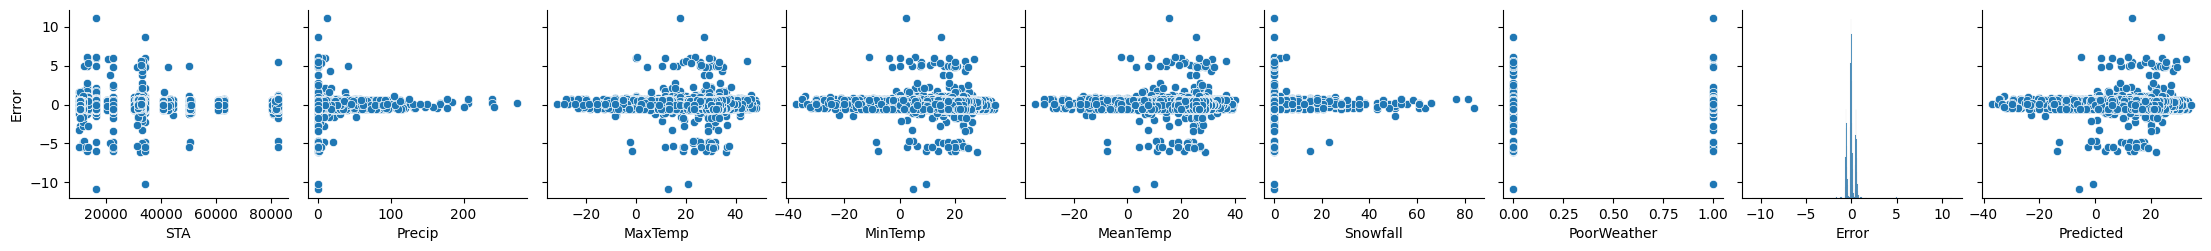

In [139]:
sns.pairplot(data=cleanWeather, y_vars="Error")

## 8. Discuss the model performance based on the plot

In [78]:
# write your answer here